In [69]:
import numpy as np
import pandas as pd
import duckdb
import matplotlib.pyplot as plt

Assumption: The number of loans approved is directly proportional to the number of small businesses. 

7(a) loan: flexible for purchasing equipment, purchasing property, refinancing, working capital
504 loan: long term investment in real estate and large equipment purchases

Questions:
1. Are younger businesses receiving more loans than before? 
2. Are older businesses receiving more loans than before?

In [7]:
df = pd.read_csv("SBA-7(a)-and-504.csv")

In [111]:
df_cleaned = df.loc[(df.index == 0) | (~df.isna().any(axis=1))].copy()

for col in df_cleaned.columns[1:]:  
    df_cleaned.loc[:,col] = (
        df_cleaned[col]
        .astype(str)         
        .str.replace(r'[,$%]', '', regex=True) 
        .str.strip()         
    )
    df_cleaned.loc[:, col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [112]:
df_cleaned

,Portfolio Segment,FY20 Amount,FY20 % 7(a) Approval Amount,7(a) Approval Amount,FY21 % 7(a) Approval Amount,FY22 7(a) Approval Amount,FY22 % 7(a) Approval Amount,FY23 7(a) Approval Amount,FY23 % 7(a) Approval Amount,FY24 7(a) Approval Amount,...,FY21 Amount 504 Approval Count,FY21 % 504 Approval Count,FY22 Amount 504 Approval Count,FY22 % 504 Approval Count,FY23 Amount 504 Approval Count,FY23 % 504 Approval Count,FY24 Amount 504 Approval Count,FY24 % 504 Approval Count,FY25 Amount 504 Approval Count,FY25 % 504 Approval Count
0,All 7(a) / 504,18575389800,NaN,29317869800,NaN,22858941600,NaN,23543070200,NaN,27364040800,...,9372,NaN,8656,NaN,5344,NaN,5471,NaN,6092,NaN
1,All Minority,5085394900,27.0,8825459900,30.0,7443878900,33.0,7786657300,33.0,8797068600,...,2004,21.0,2091,24.0,1611,30.0,1853,34.0,1957,32.0
2,Ethnicity - AMERICAN INDIAN,111945800,1.0,196752600,1.0,175524400,1.0,208081200,1.0,212216400,...,34,0.0,57,1.0,38,1.0,41,1.0,38,1.0
3,Ethnicity - ASIAN OR PACIFI,3352019400,18.0,6110721400,21.0,4779435500,21.0,4522457300,19.0,4999220700,...,949,10.0,1007,12.0,676,13.0,861,16.0,881,14.0
4,Ethnicity - BLACK,435376500,2.0,785463700,3.0,873915100,4.0,1065214700,5.0,1279143500,...,200,2.0,194,2.0,193,4.0,173,3.0,207,3.0
5,Ethnicity - HISPANIC,1026401600,6.0,1732396200,6.0,1611224400,7.0,1990904100,8.0,2305867000,...,821,9.0,833,10.0,703,13.0,778,14.0,831,14.0
8,Ethnicity - WHITE,7674735300,41.0,12142590400,41.0,9810153300,43.0,10059532600,43.0,10876846800,...,1587,17.0,1322,15.0,804,15.0,840,15.0,849,14.0
10,Gender - Female Owned 50% or less,2399564800,13.0,3754523700,13.0,3079208000,13.0,2912870800,12.0,2902936100,...,2205,24.0,2043,24.0,1170,22.0,1143,21.0,1307,21.0
11,Gender - Female Owned more than 50%,2312721000,12.0,4074195700,14.0,3412414600,15.0,3788493200,16.0,4311996600,...,1124,12.0,1069,12.0,807,15.0,807,15.0,918,15.0
12,Gender - Male Owned,13863104000,75.0,21489150400,73.0,16367038500,72.0,16841706200,72.0,20149108100,...,6043,64.0,5544,64.0,3367,63.0,3521,64.0,3867,63.0


In [104]:
biz_age_rows = [
    "Business Age - Existing or more than 2 years old",
    "Business Age - New Business or 2 years or less",
    "Business Age - Startup, Loan Funds will Open Business",
    "Business Age - Change of Ownership"
]

approval_share_7a_cols = [
    "FY20 % 7(a) Approval Count", 
    "FY21 % 7(a) Approval Count", 
    "FY22 % 7(a) Approval Count", 
    "FY23 % 7(a) Approval Count", 
    "FY24 % 7(a) Approval Count", 
    "FY25 % 7(a) Approval Count"
]

cols = ', '.join([f'"{c}"' for c in (["Portfolio Segment"] + approval_share_7a_cols)])

query = f"""
SELECT {cols}
    FROM df_cleaned
    WHERE "Portfolio Segment" IN $biz_ages
"""
shares_7a_df = duckdb.execute(query, {'biz_ages': biz_age_rows}).df()

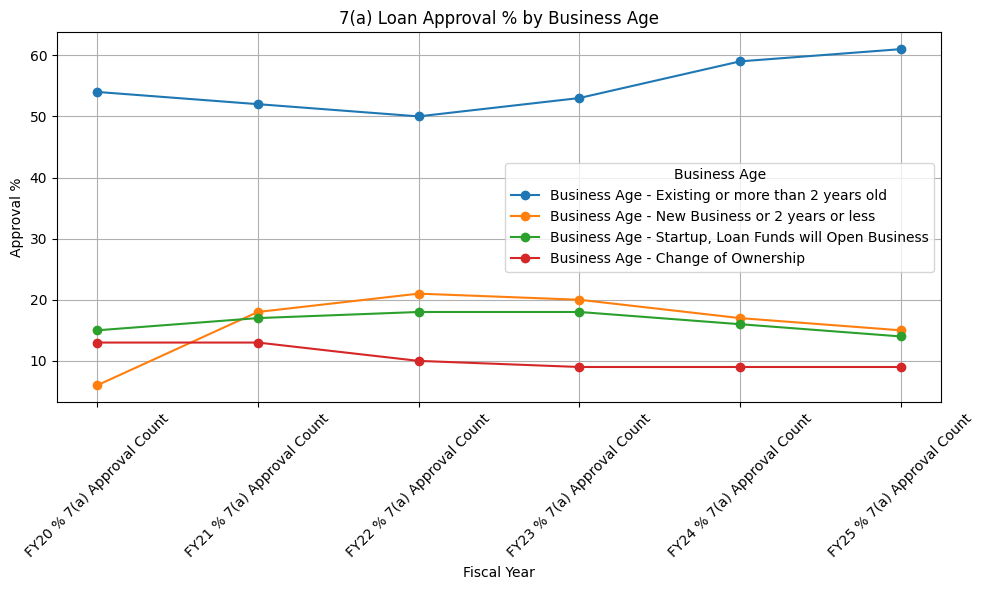

In [113]:
shares_7a_df.set_index('Portfolio Segment', inplace=True)

df_plot = shares_7a_df.T

plt.figure(figsize=(10,6))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker='o', label=col)

plt.title("7(a) Loan Approval % by Business Age")
plt.xlabel("Fiscal Year")
plt.ylabel("Approval %")
plt.xticks(rotation=45)
plt.legend(title="Business Age")
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
biz_age_rows = [
    "Business Age - Existing or more than 2 years old",
    "Business Age - New Business or 2 years or less",
    "Business Age - Startup, Loan Funds will Open Business",
    "Business Age - Change of Ownership"
]

count_7a_cols = [
    "FY20 7(a) Approval Count", 
    "FY21  7(a) Approval Count", 
    "FY22 7(a) Approval Count", 
    "FY23 7(a) Approval Count", 
    "FY24 7(a) Approval Count", 
    "FY25 7(a) Approval Count"
]

cols = ', '.join([f'"{c}"' for c in (["Portfolio Segment"] + count_7a_cols)])

query = f"""
SELECT {cols}
    FROM df_cleaned
    WHERE "Portfolio Segment" IN (SELECT UNNEST($biz_ages))
"""
count_7a_df = duckdb.execute(query, {'biz_ages': biz_age_rows}).df()

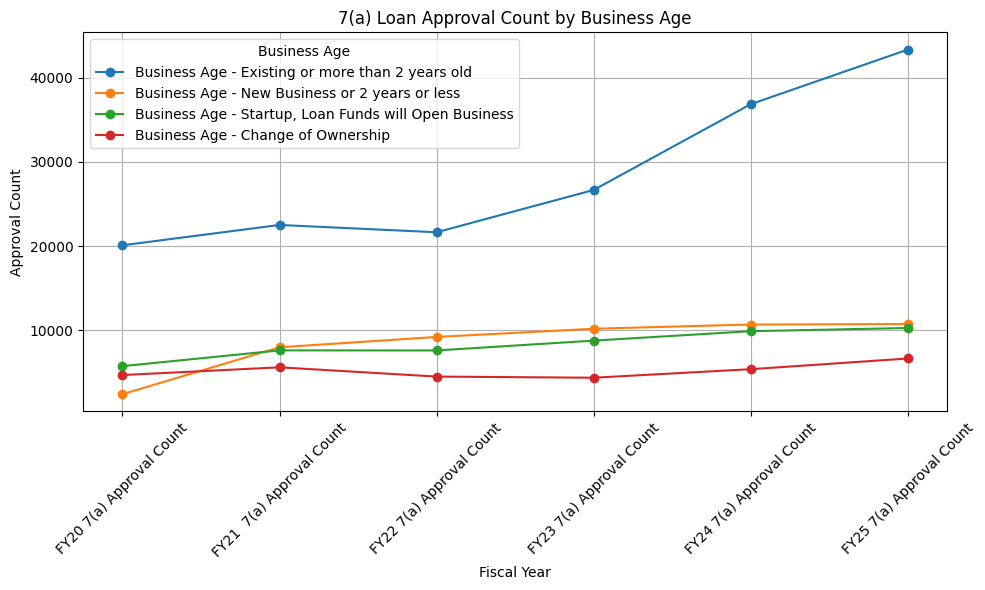

In [ ]:
count_7a_df.set_index('Portfolio Segment', inplace=True)

df_plot = count_7a_df.T

plt.figure(figsize=(10,6))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker='o', label=col)

plt.title("7(a) Loan Approval Count by Business Age")
plt.xlabel("Fiscal Year")
plt.ylabel("Approval Count")
plt.xticks(rotation=45)
plt.legend(title="Business Age")
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
approval_share_504_cols = [
    "FY20 % 504 Approval Count", 
    "FY21 % 504 Approval Count", 
    "FY22 % 504 Approval Count", 
    "FY23 % 504 Approval Count", 
    "FY24 % 504 Approval Count", 
    "FY25 % 504 Approval Count"
]

cols = ', '.join([f'"{c}"' for c in (["Portfolio Segment"] + approval_share_504_cols)])

query = f"""
SELECT {cols}
    FROM df_cleaned
    WHERE "Portfolio Segment" IN $biz_ages
"""

shares_504_df = duckdb.execute(query, {'biz_ages': biz_age_rows}).df()

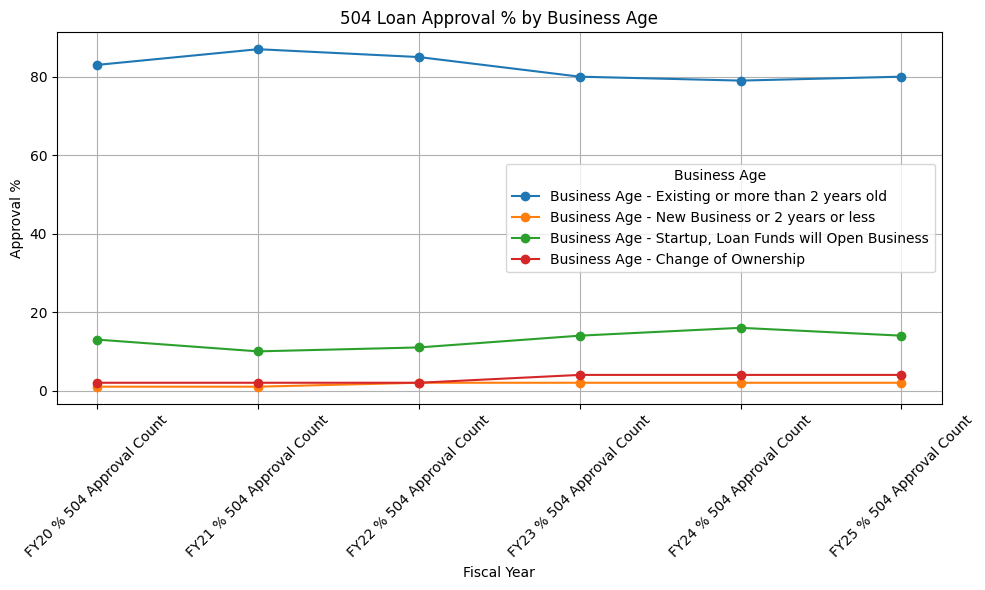

In [116]:
shares_504_df.set_index('Portfolio Segment', inplace=True)

df_plot = shares_504_df.T

plt.figure(figsize=(10,6))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker='o', label=col)

plt.title("504 Loan Approval % by Business Age")
plt.xlabel("Fiscal Year")
plt.ylabel("Approval %")
plt.xticks(rotation=45)
plt.legend(title="Business Age")
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
count_504_cols = [
    "FY20 504 Approval Count", 
    "FY21 Amount 504 Approval Count", 
    "FY22 Amount 504 Approval Count", 
    "FY23 Amount 504 Approval Count", 
    "FY24 Amount 504 Approval Count", 
    "FY25 Amount 504 Approval Count"
]

cols = ', '.join([f'"{c}"' for c in (["Portfolio Segment"] + count_504_cols)])

query = f"""
SELECT {cols}
    FROM df_cleaned
    WHERE "Portfolio Segment" IN $biz_ages
"""

count_504_df = duckdb.execute(query, {'biz_ages': biz_age_rows}).df()

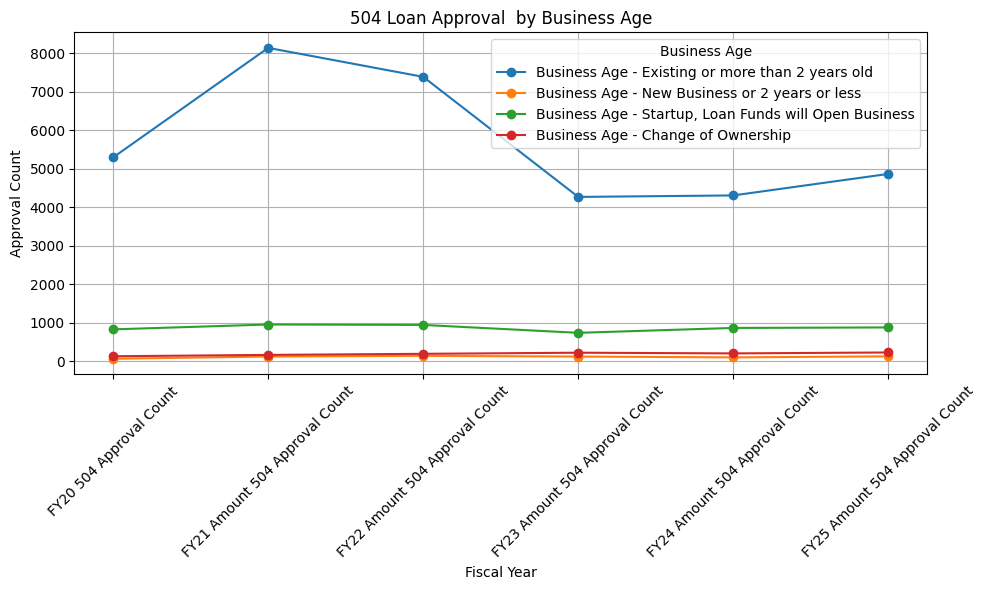

In [121]:
count_504_df.set_index('Portfolio Segment', inplace=True)

df_plot = count_504_df.T

plt.figure(figsize=(10,6))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], marker='o', label=col)

plt.title("504 Loan Approval  by Business Age")
plt.xlabel("Fiscal Year")
plt.ylabel("Approval Count")
plt.xticks(rotation=45)
plt.legend(title="Business Age")
plt.grid(True)
plt.tight_layout()
plt.show()